#**<font color='orange'>Proyecto final</font>**

## <font color='#5DADE2'>*Simulador de Cifrados Clásicos vs Modernos*</font>

In [ ]:
!pip install pycryptodome matplotlib seaborn pandas numpy

In [ ]:
# Importar bibliotecas necesarias
import time
import string
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import numpy as np
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad
import hashlib

In [ ]:
class CifradorCesar:
    """Implementación cifrado de César trabajado en clase (como Clase)"""

    def __init__(self, desplazamiento=3):
        self.desplazamiento = desplazamiento

    def cifrar(self, texto):
        resultado = ""
        for char in texto:
            if char.isalpha():
                ascii_offset = 65 if char.isupper() else 97
                resultado += chr((ord(char) - ascii_offset + self.desplazamiento) % 26 + ascii_offset)
            else:
                resultado += char
        return resultado

    def descifrar(self, texto_cifrado):
        self.desplazamiento = -self.desplazamiento
        resultado = self.cifrar(texto_cifrado)
        self.desplazamiento = -self.desplazamiento
        return resultado

    def fuerza_bruta(self, texto_cifrado):
        """Ataque de fuerza bruta probando todas las claves posibles"""
        resultados = []
        for i in range(26):
            temp_cipher = CifradorCesar(i)
            descifrado = temp_cipher.descifrar(texto_cifrado)
            resultados.append((i, descifrado))
        return resultados

In [ ]:
class CifradorVigenere:
    """Implementación cifrado Vigenère trabajado en calse (como Clase)"""

    def __init__(self, clave):
        self.clave = clave.upper()

    def cifrar(self, texto):
        resultado = ""
        clave_repetida = (self.clave * (len(texto) // len(self.clave) + 1))[:len(texto)]

        for i, char in enumerate(texto):
            if char.isalpha():
                ascii_offset = 65 if char.isupper() else 97
                desplazamiento = ord(clave_repetida[i]) - 65
                resultado += chr((ord(char) - ascii_offset + desplazamiento) % 26 + ascii_offset)
            else:
                resultado += char
        return resultado

    def descifrar(self, texto_cifrado):
        resultado = ""
        clave_repetida = (self.clave * (len(texto_cifrado) // len(self.clave) + 1))[:len(texto_cifrado)]

        for i, char in enumerate(texto_cifrado):
            if char.isalpha():
                ascii_offset = 65 if char.isupper() else 97
                desplazamiento = ord(clave_repetida[i]) - 65
                resultado += chr((ord(char) - ascii_offset - desplazamiento) % 26 + ascii_offset)
            else:
                resultado += char
        return resultado

    def analisis_frecuencias(self, texto):
        """Análisis de frecuencias para criptoanálisis"""
        texto_limpio = ''.join([c.upper() for c in texto if c.isalpha()])
        frecuencias = Counter(texto_limpio)
        return frecuencias

In [ ]:
# Implentación cifrado (AES)
class CifradorAES:
    """Implementación de cifrado AES-256"""

    def __init__(self):
        self.key = None

    def generar_clave(self):
        """Genera una clave AES-256 aleatoria"""
        self.key = get_random_bytes(32)  # 256 bits
        return self.key

    def cifrar(self, texto):
        if not self.key:
            self.generar_clave()

        cipher = AES.new(self.key, AES.MODE_CBC)
        texto_bytes = texto.encode('utf-8')
        texto_padded = pad(texto_bytes, AES.block_size)
        texto_cifrado = cipher.encrypt(texto_padded)
        return cipher.iv + texto_cifrado  # IV + datos cifrados

    def descifrar(self, datos_cifrados):
        if not self.key:
            raise ValueError("No hay clave definida")

        iv = datos_cifrados[:16]  # Primeros 16 bytes son el IV
        datos = datos_cifrados[16:]

        cipher = AES.new(self.key, AES.MODE_CBC, iv)
        texto_descifrado = unpad(cipher.decrypt(datos), AES.block_size)
        return texto_descifrado.decode('utf-8')

In [ ]:
class AnalizadorSeguridad:
    """Clase para analizar y comparar la seguridad de los cifrados"""

    def __init__(self):
        self.resultados = []

    def medir_tiempo_cifrado(self, cifrador, texto, repeticiones=1000):
        """Mide el tiempo de cifrado promedio"""
        tiempos = []
        for _ in range(repeticiones):
            inicio = time.time()
            cifrador.cifrar(texto)
            fin = time.time()
            tiempos.append(fin - inicio)
        return np.mean(tiempos) * 1000  # en milisegundos

    def medir_tiempo_descifrado(self, cifrador, texto_cifrado, repeticiones=1000):
        """Mide el tiempo de descifrado promedio"""
        tiempos = []
        for _ in range(repeticiones):
            inicio = time.time()
            if isinstance(cifrador, CifradorAES):
                cifrador.descifrar(texto_cifrado)
            else:
                cifrador.descifrar(texto_cifrado)
            fin = time.time()
            tiempos.append(fin - inicio)
        return np.mean(tiempos) * 1000  # en milisegundos

    def calcular_entropia(self, texto):
        """Calcula la entropía de Shannon del texto"""
        frecuencias = Counter(texto)
        longitud = len(texto)
        entropia = 0
        for freq in frecuencias.values():
            prob = freq / longitud
            if prob > 0:
                entropia -= prob * np.log2(prob)
        return entropia

    def analizar_resistencia_fuerza_bruta(self, tipo_cifrado):
        """Calcula la resistencia teórica a ataques de fuerza bruta"""
        if tipo_cifrado == "César":
            return 26  # 26 claves posibles
        elif tipo_cifrado == "Vigenère":
            return 26**5  # Asumiendo clave de 5 caracteres
        elif tipo_cifrado == "AES":
            return 2**256  # 256 bits de clave
        return 0

In [ ]:
def generar_dataset_prueba():
    """Genera un dataset de textos de prueba"""
    textos = [
        "En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua, rocín flaco y galgo corredor.",
        "Había una vez en un reino muy lejano una princesa que vivía en un castillo encantado rodeado de dragones y criaturas mágicas que protegían un gran tesoro.",
        "La ciberseguridad es fundamental en el mundo moderno donde los datos personales y la información confidencial requieren protección constante contra amenazas digitales.",
        "Colombia es un país diverso con múltiples regiones geográficas que incluyen la costa Caribe, la región Pacífica, los Andes, la Amazonía y los Llanos Orientales.",
        "Los algoritmos de cifrado han evolucionado significativamente desde los métodos clásicos hasta los sistemas modernos que utilizan matemáticas complejas para garantizar la seguridad."
    ]

    # Generar textos de diferentes longitudes
    dataset = []
    for i, texto in enumerate(textos):
        dataset.append({
            'id': i + 1,
            'texto': texto,
            'longitud': len(texto),
            'tipo': f'Texto_{i+1}'
        })

    return dataset

In [ ]:
def ejecutar_comparativa_completa():
    """Ejecuta la comparativa completa de todos los cifrados"""
    print("SIMULADOR DE CIFRADOS CLÁSICOS VS MODERNOS")
    print("=" * 60)

    # Generar dataset
    dataset = generar_dataset_prueba()
    analizador = AnalizadorSeguridad()

    # Configurar cifradores
    cesar = CifradorCesar(7)
    vigenere = CifradorVigenere("SEGURIDAD")
    aes = CifradorAES()

    resultados_comparativa = []

    for datos in dataset:
        texto = datos['texto']
        print(f"\nAnalizando: {datos['tipo']} ({datos['longitud']} caracteres)")

        # Análisis César
        inicio = time.time()
        texto_cesar = cesar.cifrar(texto)
        tiempo_cesar_cifrado = (time.time() - inicio) * 1000

        inicio = time.time()
        texto_cesar_descifrado = cesar.descifrar(texto_cesar)
        tiempo_cesar_descifrado = (time.time() - inicio) * 1000

        entropia_cesar = analizador.calcular_entropia(texto_cesar)

        # Análisis Vigenère
        inicio = time.time()
        texto_vigenere = vigenere.cifrar(texto)
        tiempo_vigenere_cifrado = (time.time() - inicio) * 1000

        inicio = time.time()
        texto_vigenere_descifrado = vigenere.descifrar(texto_vigenere)
        tiempo_vigenere_descifrado = (time.time() - inicio) * 1000

        entropia_vigenere = analizador.calcular_entropia(texto_vigenere)

        # Análisis AES
        inicio = time.time()
        texto_aes = aes.cifrar(texto)
        tiempo_aes_cifrado = (time.time() - inicio) * 1000

        inicio = time.time()
        texto_aes_descifrado = aes.descifrar(texto_aes)
        tiempo_aes_descifrado = (time.time() - inicio) * 1000

        entropia_aes = analizador.calcular_entropia(str(texto_aes))

        # Guardar resultados
        resultado = {
            'texto_id': datos['id'],
            'longitud': datos['longitud'],
            'cesar_cifrado_ms': tiempo_cesar_cifrado,
            'cesar_descifrado_ms': tiempo_cesar_descifrado,
            'cesar_entropia': entropia_cesar,
            'vigenere_cifrado_ms': tiempo_vigenere_cifrado,
            'vigenere_descifrado_ms': tiempo_vigenere_descifrado,
            'vigenere_entropia': entropia_vigenere,
            'aes_cifrado_ms': tiempo_aes_cifrado,
            'aes_descifrado_ms': tiempo_aes_descifrado,
            'aes_entropia': entropia_aes
        }

        resultados_comparativa.append(resultado)

        # Mostrar resultados parciales
        print(f"  César    - Cifrado: {tiempo_cesar_cifrado:.4f}ms | Entropía: {entropia_cesar:.2f}")
        print(f"  Vigenère - Cifrado: {tiempo_vigenere_cifrado:.4f}ms | Entropía: {entropia_vigenere:.2f}")
        print(f"  AES      - Cifrado: {tiempo_aes_cifrado:.4f}ms | Entropía: {entropia_aes:.2f}")

    return resultados_comparativa, dataset

In [ ]:
def crear_visualizaciones(resultados):
    """Crea visualizaciones comparativas"""
    df = pd.DataFrame(resultados)

    # Configurar estilo
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Comparativa de Cifrados: Clásicos vs Modernos', fontsize=16, fontweight='bold')

    # Gráfico 1: Tiempos de cifrado
    ax1 = axes[0, 0]
    longitudes = df['longitud']
    ax1.plot(longitudes, df['cesar_cifrado_ms'], 'o-', label='César', color='red', linewidth=2)
    ax1.plot(longitudes, df['vigenere_cifrado_ms'], 's-', label='Vigenère', color='blue', linewidth=2)
    ax1.plot(longitudes, df['aes_cifrado_ms'], '^-', label='AES', color='green', linewidth=2)
    ax1.set_xlabel('Longitud del texto (caracteres)')
    ax1.set_ylabel('Tiempo de cifrado (ms)')
    ax1.set_title('Rendimiento de Cifrado')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Gráfico 2: Entropía
    ax2 = axes[0, 1]
    metodos = ['César', 'Vigenère', 'AES']
    entropias_promedio = [
        df['cesar_entropia'].mean(),
        df['vigenere_entropia'].mean(),
        df['aes_entropia'].mean()
    ]
    colores = ['red', 'blue', 'green']
    bars = ax2.bar(metodos, entropias_promedio, color=colores, alpha=0.7)
    ax2.set_ylabel('Entropía promedio')
    ax2.set_title('Entropía de los Textos Cifrados')
    ax2.grid(True, alpha=0.3, axis='y')

    # Añadir valores en las barras
    for bar, valor in zip(bars, entropias_promedio):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{valor:.2f}', ha='center', va='bottom')

    # Gráfico 3: Resistencia a fuerza bruta (escala logarítmica)
    ax3 = axes[1, 0]
    resistencias = [26, 26**5, 2**128]  # Simplificado para visualización
    resistencias_log = [np.log10(float(r)) for r in resistencias]
    bars3 = ax3.bar(metodos, resistencias_log, color=colores, alpha=0.7)
    ax3.set_ylabel('Log₁₀(Combinaciones posibles)')
    ax3.set_title('Resistencia a Fuerza Bruta')
    ax3.grid(True, alpha=0.3, axis='y')

    # Añadir valores en las barras
    for bar, valor in zip(bars3, resistencias_log):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{valor:.1f}', ha='center', va='bottom')

    # Gráfico 4: Comparativa general
    ax4 = axes[1, 1]
    categorias = ['Velocidad\n(menor=mejor)', 'Seguridad\n(mayor=mejor)', 'Simplicidad\n(mayor=mejor)']

    # Puntuaciones normalizadas (1-10)
    cesar_scores = [10, 1, 10]      # Muy rápido, muy inseguro, muy simple
    vigenere_scores = [8, 3, 6]    # Rápido, poco seguro, moderadamente simple
    aes_scores = [6, 10, 2]        # Moderado, muy seguro, complejo

    x = np.arange(len(categorias))
    width = 0.25

    ax4.bar(x - width, cesar_scores, width, label='César', color='red', alpha=0.7)
    ax4.bar(x, vigenere_scores, width, label='Vigenère', color='blue', alpha=0.7)
    ax4.bar(x + width, aes_scores, width, label='AES', color='green', alpha=0.7)

    ax4.set_ylabel('Puntuación (1-10)')
    ax4.set_title('Evaluación General')
    ax4.set_xticks(x)
    ax4.set_xticklabels(categorias)
    ax4.legend()
    ax4.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

In [ ]:
def demostrar_criptoanalisis():
    """Demuestra técnicas de criptoanálisis"""
    print("\nDEMOSTRACIÓN DE CRIPTOANÁLISIS")
    print("=" * 50)

    texto_original = "ESTE ES UN MENSAJE SECRETO MUY IMPORTANTE"
    print(f"Texto original: {texto_original}")

    # Demostrar vulnerabilidad del César
    cesar = CifradorCesar(5)
    texto_cesar = cesar.cifrar(texto_original)
    print(f"Texto cifrado con César: {texto_cesar}")

    print("\nAplicando fuerza bruta al cifrado César:")
    resultados_bruta = cesar.fuerza_bruta(texto_cesar)
    for i, (clave, descifrado) in enumerate(resultados_bruta[:10]):
        print(f"Clave {clave:2d}: {descifrado}")

    # Análisis de frecuencias para Vigenère
    print(f"\nAnálisis de frecuencias:")
    vigenere = CifradorVigenere("CLAVE")
    texto_vigenere = vigenere.cifrar(texto_original)
    print(f"Texto cifrado con Vigenère: {texto_vigenere}")

    frecuencias = vigenere.analisis_frecuencias(texto_vigenere)
    print("Frecuencias de letras en texto cifrado:")
    for letra, freq in frecuencias.most_common(5):
        print(f"  {letra}: {freq} veces")

SIMULADOR DE CIFRADOS CLÁSICOS VS MODERNOS

Analizando: Texto_1 (177 caracteres)
  César    - Cifrado: 0.0443ms | Entropía: 4.14
  Vigenère - Cifrado: 0.0808ms | Entropía: 4.45
  AES      - Cifrado: 8.5673ms | Entropía: 4.33

Analizando: Texto_2 (154 caracteres)
  César    - Cifrado: 0.0350ms | Entropía: 4.07
  Vigenère - Cifrado: 0.0432ms | Entropía: 4.43
  AES      - Cifrado: 0.0703ms | Entropía: 4.11

Analizando: Texto_3 (167 caracteres)
  César    - Cifrado: 0.0350ms | Entropía: 4.04
  Vigenère - Cifrado: 0.0443ms | Entropía: 4.53
  AES      - Cifrado: 0.0458ms | Entropía: 4.20

Analizando: Texto_4 (160 caracteres)
  César    - Cifrado: 0.0319ms | Entropía: 4.33
  Vigenère - Cifrado: 0.0405ms | Entropía: 4.60
  AES      - Cifrado: 0.0331ms | Entropía: 4.26

Analizando: Texto_5 (181 caracteres)
  César    - Cifrado: 0.0365ms | Entropía: 4.13
  Vigenère - Cifrado: 0.0579ms | Entropía: 4.49
  AES      - Cifrado: 0.0360ms | Entropía: 4.17


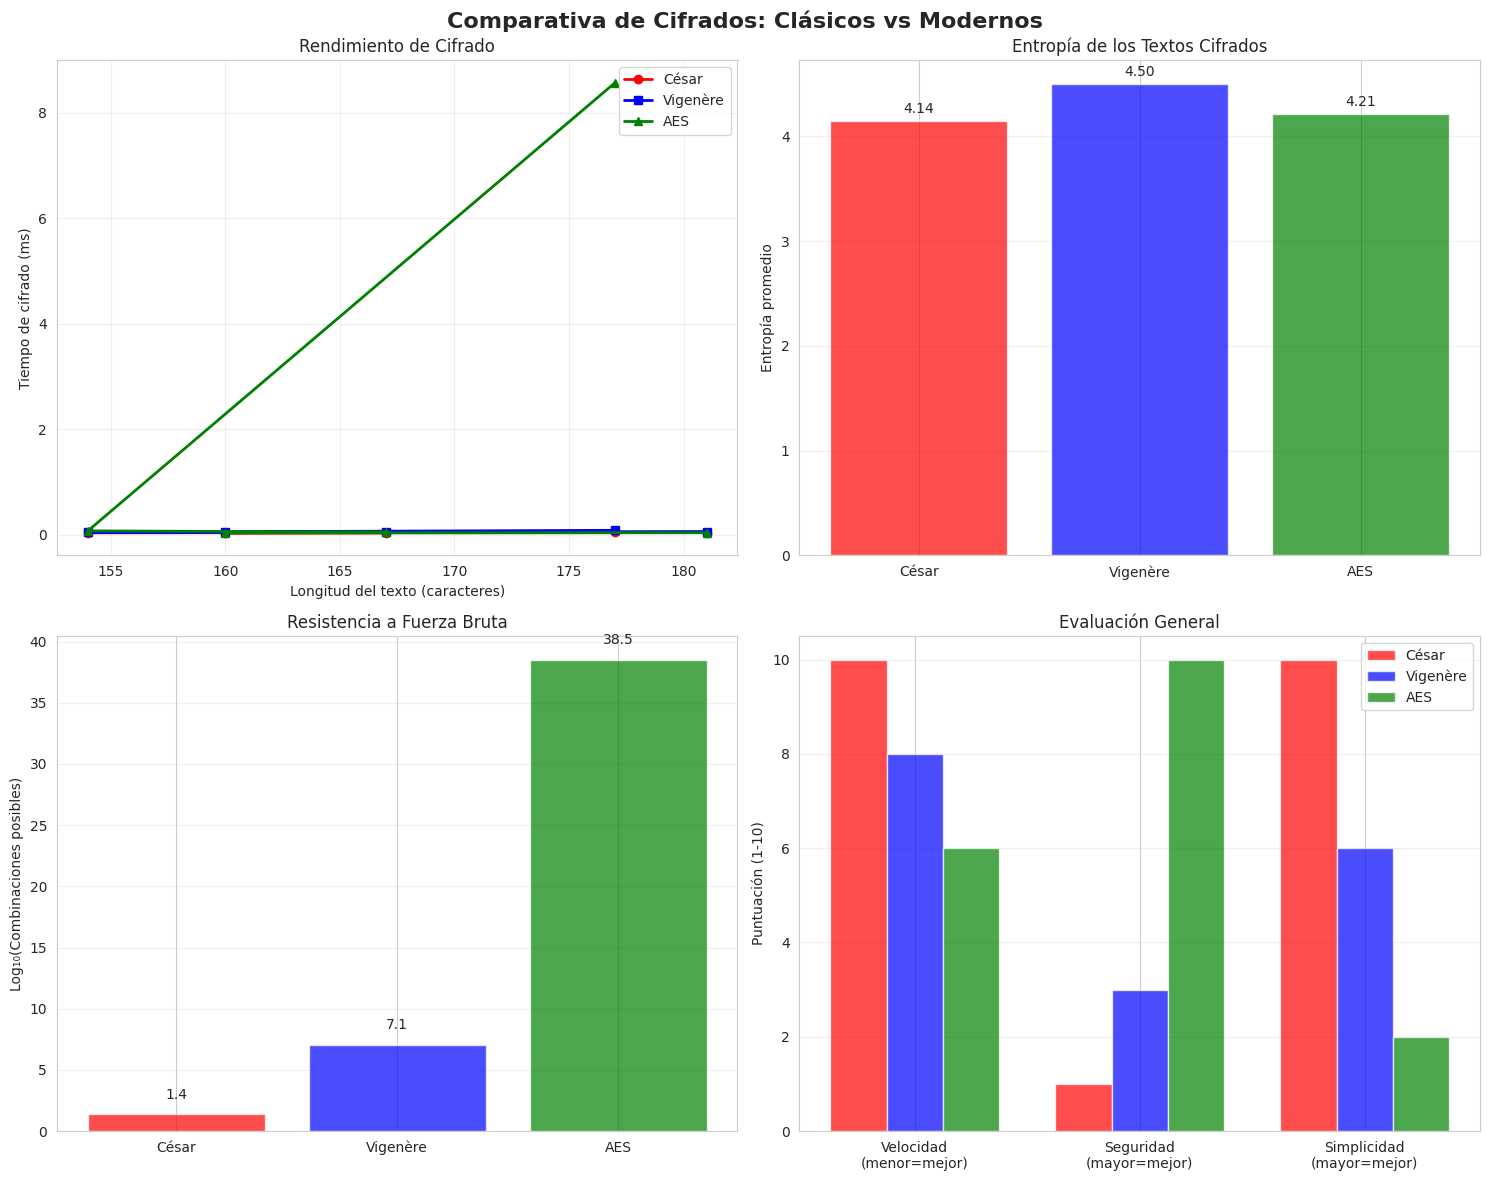


DEMOSTRACIÓN DE CRIPTOANÁLISIS
Texto original: ESTE ES UN MENSAJE SECRETO MUY IMPORTANTE
Texto cifrado con César: JXYJ JX ZS RJSXFOJ XJHWJYT RZD NRUTWYFSYJ

Aplicando fuerza bruta al cifrado César:
Clave  0: JXYJ JX ZS RJSXFOJ XJHWJYT RZD NRUTWYFSYJ
Clave  1: IWXI IW YR QIRWENI WIGVIXS QYC MQTSVXERXI
Clave  2: HVWH HV XQ PHQVDMH VHFUHWR PXB LPSRUWDQWH
Clave  3: GUVG GU WP OGPUCLG UGETGVQ OWA KORQTVCPVG
Clave  4: FTUF FT VO NFOTBKF TFDSFUP NVZ JNQPSUBOUF
Clave  5: ESTE ES UN MENSAJE SECRETO MUY IMPORTANTE
Clave  6: DRSD DR TM LDMRZID RDBQDSN LTX HLONQSZMSD
Clave  7: CQRC CQ SL KCLQYHC QCAPCRM KSW GKNMPRYLRC
Clave  8: BPQB BP RK JBKPXGB PBZOBQL JRV FJMLOQXKQB
Clave  9: AOPA AO QJ IAJOWFA OAYNAPK IQU EILKNPWJPA

Análisis de frecuencias:
Texto cifrado con Vigenère: GDTZ GD PR XEIWCUE WGNRZXQ MPC TMKSTEAIXG
Frecuencias de letras en texto cifrado:
  G: 4 veces
  T: 3 veces
  X: 3 veces
  E: 3 veces
  D: 2 veces

RESUMEN DE RESULTADOS
César: Muy rápido, pero extremadamente vulnerable
Vigenèr

In [ ]:
if __name__ == "__main__":
    # Ejecutar análisis completo
    resultados, dataset = ejecutar_comparativa_completa()

    # Crear visualizaciones
    crear_visualizaciones(resultados)

    # Demostrar criptoanálisis
    demostrar_criptoanalisis()

    # Resumen final
    print("\nRESUMEN DE RESULTADOS")
    print("=" * 40)
    print("César: Muy rápido, pero extremadamente vulnerable")
    print("Vigenère: Rápido, vulnerable al análisis de frecuencias")
    print("AES: Más lento, pero criptográficamente seguro")
    print("\nConclusión: Los métodos modernos sacrifican velocidad por seguridad")

#**<font color='red'>Entrenamiento</font>**

## <font color='#5DADE2'>*Calculadora sencilla*</font>


In [ ]:
def suma(a, b):
    return a + b

def resta(a, b):
    return a - b

def multiplicacion(a, b):
    return a * b

def division(a, b):
    if b == 0:
        return "Error: División por cero no permitida."
    else:
        return a / b

def funcionPrincipal():
    print("Calculadora:")
    print("1. Suma")
    print("2. Resta")
    print("3. Multiplicación")
    print("4. División")
    print("5. Salir")

    while True:
        opcion = input("Seleccione una operación: ")

        if opcion == "1":
            num1 = float(input("Ingrese el primer número: "))
            num2 = float(input("Ingrese el segundo número: "))
            resultado = suma(num1, num2)
            print("El resultado de la suma es:", resultado)

        elif opcion == "2":
            num1 = float(input("Ingrese el primer número: "))
            num2 = float(input("Ingrese el segundo número: "))
            resultado = resta(num1, num2)
            print("El resultado de la resta es:", resultado)

        elif opcion == "3":
            num1 = float(input("Ingrese el primer número: "))
            num2 = float(input("Ingrese el segundo número: "))
            resultado = multiplicacion(num1, num2)
            print("El resultado de la multiplicación es:", resultado)

        elif opcion == "4":
            num1 = float(input("Ingrese el primer número: "))
            num2 = float(input("Ingrese el segundo número: "))
            resultado = division(num1, num2)
            print("El resultado de la división es:", resultado)

        elif opcion == "5":
            print("Gracias por utilizar la calculadora.")
            break

        else:
            print("Opción no válida. Seleccione una opción válida.")

if __name__ == "__main__":
    funcionPrincipal()

## <font color='#5DADE2'>*Calculadora científica*</font>



In [ ]:
import math

def suma(a, b):
    return a + b

def resta(a, b):
    return a - b

def multiplicacion(a, b):
    return a * b

def division(a, b):
    if b == 0:
        return "Error: División por cero."
    else:
        return a / b

def potencia(a, b):
    return a ** b

def raiz_cuadrada(a):
    return a ** 0.5

def factorial(a):
    if a < 0:
        return "Error: Número negativo."
    elif a == 0:
        return 1
    else:
        resultado = 1
        for i in range(1, a + 1):
            resultado *= i
        return resultado

def seno(a):
    return math.sin(a)

def coseno(a):
    return math.cos(a)

def tangente(a):
    return math.tan(a)

def logaritmo10(a):
    return round(math.log(a), 2) # Base 10

def logaritmo_base_n(a, n):
    return math.log(a, n)

def exponencial(a):
    return math.exp(a) # base e

def calculadoraCientifica():
    print("""
    --------------------------
            Calculadora
    --------------------------

      1. Suma
      2. Resta
      3. Multiplicación
      4. División
      5. Logaritmo (base n)
      6. Potencia
      7. Raíz Cuadrada
      8. Factorial
      9. Seno
      10. Coseno
      11. Tangente
      12. Logaritmo (base 10)
      13. Exponencial
      14. Salir
    """)

    while True:
        opcion = input("\nSeleccione una operación: ")

        if opcion == '14':
            print("\nGracias por utilizar la calculadora.")
            break

        elif opcion in ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13"]:

          if opcion in ["1", "2", "3", "4", "5"]:
            num1 = float(input("\nIngrese el primer número: "))
            num2 = float(input("Ingrese el segundo número: "))

          else:
            num1 = float(input("\nIngrese el número: "))

          if opcion == "1":
              resultado = suma(num1, num2)
              print("\nEl resultado de la suma es:", resultado)

          elif opcion == "2":
              resultado = resta(num1, num2)
              print("\nEl resultado de la resta es:", resultado)

          elif opcion == "3":
              resultado = multiplicacion(num1, num2)
              print("\nEl resultado de la multiplicación es:", resultado)

          elif opcion == "4":
              resultado = division(num1, num2)
              print("\nEl resultado de la división es:", resultado)

          elif opcion == "5":
              resultado = logaritmo_base_n(num1, num2)
              print("\nEl resultado del logaritmo es:", resultado)

          elif opcion == "6":
              resultado = potencia(num1, num2)
              print("\nEl resultado de la potencia es:", resultado)

          elif opcion == "7":
              resultado = raiz_cuadrada(num1)
              print("\nEl resultado de la raíz cuadrada es:", resultado)

          elif opcion == "8":
              resultado = factorial(int(num1))
              print("\nEl resultado del factorial es:", resultado)

          elif opcion == "9":
              resultado = seno(num1)
              print("\nEl resultado del seno es:", resultado)

          elif opcion == "10":
              resultado = coseno(num1)
              print("\nEl resultado del coseno es:", resultado)

          elif opcion == "11":
              resultado = tangente(num1)
              print("\nEl resultado de la tangente es:", resultado)

          elif opcion == "12":
              resultado = logaritmo10(num1)
              print("\nEl resultado del logaritmo es:", resultado)

          elif opcion == "13":
              resultado = exponencial(num1)
              print("\nEl resultado de la exponencial es:", resultado)


        else:
            print("\nOpción no válida.")

if __name__ == "__main__":
    calculadoraCientifica()

## <font color='#5DADE2'>*Ejercicios estructuras*</font>


In [ ]:
# Función para recorrer una lista
def recorrer_lista():
    frutas = ["manzana", "banana", "cereza"]
    print("\nRecorriendo la lista:")
    for fruta in frutas:
        print(f"- {fruta}")

# Función para recorrer una tupla
def recorrer_tupla():
    numeros = (10, 20, 30)
    print("\nRecorriendo la tupla:")
    for numero in numeros:
        print(f"- {numero}")

# Función para recorrer un conjunto
def recorrer_conjunto():
    colores = {"rojo", "verde", "azul"}
    print("\nRecorriendo el conjunto:")
    for color in colores:
        print(f"- {color}")

# Función para recorrer un diccionario
def recorrer_diccionario():
    persona = {
        "nombre": "Ana",
        "edad": 30,
        "ciudad": "Madrid"
    }
    print("\nRecorriendo el diccionario:")
    for clave, valor in persona.items():
        print(f"- {clave}: {valor}")

# Función principal del menú
def menu():
    while True:
        print("""
        \n--- Menú ---

1. Recorrer lista
2. Recorrer tupla
3. Recorrer conjunto
4. Recorrer diccionario
5. Salir
        """)

        opcion = input("Elige una opción (1-5): ")

        match opcion:
            case "1":
                recorrer_lista()
            case "2":
                recorrer_tupla()
            case "3":
                recorrer_conjunto()
            case "4":
                recorrer_diccionario()
            case "5":
                print("Programa terminado.")
                break
            case _:
                print("Opción inválida.")

# Ejecutar el menú
if __name__ == "__main__":
    menu()


## <font color='#5DADE2'>*Sistema de compras de productos*</font>

In [ ]:
# Clase Producto
class Producto:
    def __init__(self, id, nombre, precio, stock):
        self.id = id
        self.nombre = nombre
        self.precio = precio
        self.stock = stock

    def mostrar(self):
        print(f"ID: {self.id} | Nombre: {self.nombre} | Precio: ${self.precio} | Stock: {self.stock}")

# Base de datos simulada (lista)
inventario = []

# CREATE - Agregar un producto nuevo
def crear_producto():
    id = input("Ingrese el ID del producto: ")
    for p in inventario:
        if p.id == id:
            print("Error: Ya existe un producto con ese ID.")
            return
    nombre = input("Ingrese el nombre del producto: ")
    try:
        precio = float(input("Ingrese el precio del producto: "))
        stock = int(input("Ingrese el stock del producto: "))
        nuevo = Producto(id, nombre, precio, stock)
        inventario.append(nuevo)
        print("Producto creado exitosamente.")
    except ValueError:
        print("Error en los datos ingresados.")

# READ - Mostrar todos los productos
def leer_productos():
    if not inventario:
        print("Inventario vacío.")
    else:
        print("\n--- Lista de Productos ---")
        for producto in inventario:
            producto.mostrar()

# UPDATE - Actualizar producto existente
def actualizar_producto():
    id = input("Ingrese el ID del producto a actualizar: ")
    for producto in inventario:
        if producto.id == id:
            nuevo_nombre = input("Nuevo nombre: ")
            try:
                nuevo_precio = float(input("Nuevo precio: "))
                nuevo_stock = int(input("Nuevo stock: "))
                producto.nombre = nuevo_nombre
                producto.precio = nuevo_precio
                producto.stock = nuevo_stock
                print("Producto actualizado.")
                return
            except ValueError:
                print("Error: Precio o stock inválidos.")
                return
    print("Producto no encontrado.")

# DELETE - Eliminar un producto
def eliminar_producto():
    id = input("Ingrese el ID del producto a eliminar: ")
    for producto in inventario:
        if producto.id == id:
            inventario.remove(producto)
            print("Producto eliminado.")
            return
    print("Producto no encontrado.")

# Menú CRUD
def menu_crud():
    while True:
        print("\n=== CRUD DE PRODUCTOS ===")
        print("1. Crear producto")
        print("2. Leer productos")
        print("3. Actualizar producto")
        print("4. Eliminar producto")
        print("5. Salir")

        opcion = input("Seleccione una opción (1-5): ")

        match opcion:
            case "1":
                crear_producto()
            case "2":
                leer_productos()
            case "3":
                actualizar_producto()
            case "4":
                eliminar_producto()
            case "5":
                print("Saliendo del programa. ¡Hasta luego!")
                break
            case _:
                print("Opción inválida.")

# Ejecutar el menú
if __name__ == "__main__":
    menu_crud()


## <font color='#5DADE2'>*Crear Tablas*</font>


In [ ]:
import pandas as pd

# Datos de productos
productos = [
    [1, "Televisor", 500, 20],
    [2, "Refrigerador", 750, 15],
    [3, "Microondas", 120, 40],
    [4, "Lavadora", 600, 10],
    [5, "Secadora", 580, 8],
    [6, "Licuadora", 90, 50],
    [7, "Tostadora", 60, 30],
    [8, "Aire acondicionado", 800, 5],
    [9, "Cafetera", 100, 25],
    [10, "Aspiradora", 350, 12]
]

# Crear DataFrame
columnas = ["ID", "Nombre", "Precio (USD)", "Stock"]
df = pd.DataFrame(productos, columns=columnas)

# Mostrar la tabla
print("\nInventario de Productos:\n")
print(df)

# Análisis extra:
print("\nProductos con precio mayor a $500:")
print(df[df["Precio (USD)"] > 500])

print("\nProductos con stock menor o igual a 10:")
print(df[df["Stock"] <= 10])

print("\nProducto más caro:")
print(df[df["Precio (USD)"] == df["Precio (USD)"].max()])

print("\nProducto más barato:")
print(df[df["Precio (USD)"] == df["Precio (USD)"].min()])

print("""
----------------------------------------------------------------------------
                          Tabla para filtros
----------------------------------------------------------------------------
""")
df

## <font color='#5DADE2'>*Algoritmo de César*</font>

In [ ]:
import pandas as pd

alfabeto = "abcdefghijklmnñopqrstuvwxyz"

# Función de cifrado César
def cifrar_cesar_es(texto, desplazamiento):
    resultado = ""
    for caracter in texto:
        if caracter.lower() in alfabeto:
            es_mayus = caracter.isupper()
            indice = alfabeto.index(caracter.lower())
            nuevo_indice = (indice + desplazamiento) % len(alfabeto)
            nuevo_caracter = alfabeto[nuevo_indice]
            resultado += nuevo_caracter.upper() if es_mayus else nuevo_caracter
        else:
            resultado += caracter
    return resultado

# Función de descifrado (usa desplazamiento negativo)
def descifrar_cesar_es(texto_cifrado, desplazamiento):
    return cifrar_cesar_es(texto_cifrado, -desplazamiento)

# DataFrame con mensajes y claves
datos = {
    "msj_original": [
        "hola mundo", "python", "la ñ es importante", "esto es una prueba",
        "mañana es sabado", "el cielo es azul", "nos vemos pronto", "la clave secreta",
        "inteligencia artificial", "mensaje cifrado"
    ],
    "Clave": [3, 5, 2, 7, 1, 4, 6, 2, 9, 3]
}

df = pd.DataFrame(datos)

# Aplicar cifrado y descifrado para la tabla
df["msj_cifrado"] = df.apply(lambda row: cifrar_cesar_es(row["msj_original"], row["Clave"]), axis=1)
df["msj_descifrado"] = df.apply(lambda row: descifrar_cesar_es(row["msj_cifrado"], row["Clave"]), axis=1)

#print(df)

df

## <font color='#5DADE2'>*Primeros 100 números primos*</font>

In [ ]:
def es_primo(n):
    if n < 2:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

# Lista para guardar los 100 primeros primos
primos = []
numero = 2

while len(primos) < 100:
    if es_primo(numero):
        primos.append(numero)
    numero += 1

print("Primeros 100 números primos:")
print(primos)

# Ejercicio anterior con funciones lambda
print("\nPrimeros 100 números primos con funciones lambda:")
print(list(filter(lambda x: es_primo(x), range(2, 1000))))

## <font color='#5DADE2'>*Fuerza bruta con cifrado de César*</font>

In [ ]:
def descifrar_cesar(texto, desplazamiento):
    alfabeto = "abcdefghijklmnopqrstuvwxyz"
    resultado = ""

    for caracter in texto:
        if caracter.lower() in alfabeto:
            mayus = caracter.isupper()
            i = alfabeto.index(caracter.lower())
            nuevo_i = (i - desplazamiento) % len(alfabeto)
            nuevo_c = alfabeto[nuevo_i]
            resultado += nuevo_c.upper() if mayus else nuevo_c
        else:
            resultado += caracter
    return resultado

mensaje_cifrado = "khoor zruog"  # "hello world" cifrado con desplazamiento 3

print("Intentando todas las claves (fuerza bruta César):")
for clave in range(1, 27):
    posible = descifrar_cesar(mensaje_cifrado, clave)
    print(f"Clave {clave:2}: {posible}")


## <font color='#5DADE2'>*Vigenère por fuerza bruta con claves de 3 letras*</font>

In [ ]:
import itertools

alfabeto = "abcdefghijklmnopqrstuvwxyz"

def descifrar_vigenere(texto, clave):
    descifrado = ""
    clave_repetida = (clave * (len(texto) // len(clave) + 1))[:len(texto)]

    for c, k in zip(texto, clave_repetida):
        if c.lower() in alfabeto:
            i = alfabeto.index(c.lower())
            j = alfabeto.index(k.lower())
            nueva_letra = alfabeto[(i - j) % 26]
            descifrado += nueva_letra.upper() if c.isupper() else nueva_letra
        else:
            descifrado += c
    return descifrado

mensaje_cifrado = "hfnos wzfoz"  #"hello world" con clave "abc"

# Fuerza bruta: claves de 3 letras
print("\nFuerza bruta con claves de 3 letras (Vigenère):")
contador = 0

for clave_tuple in itertools.product(alfabeto, repeat=3):
    clave = ''.join(clave_tuple)
    resultado = descifrar_vigenere(mensaje_cifrado, clave)
    contador += 1
    print(f"Clave '{clave}': {resultado}")
    if contador >= 20:
        break  # para evitar imprimir los miles posibles, se limita a 20 intentos


#**<font color='yellow'>Experiencia</font>**

## <font color='#5DADE2'>*Ahorcado - Análisis de frecuencias*</font>


In [ ]:
import random
from collections import Counter

# Lista de palabras (puedes ampliar con palabras más complejas o cifradas)
palabras = ["seguridad", "criptografia", "firewall", "contraseña", "virus", "phishing", "ciberataque"]

# Letras más frecuentes en español (de mayor a menor)
frecuencia_esp = "eaosrnidlctumpbgvyqhfzjxñkqw"

# Seleccionamos una palabra secreta
palabra = random.choice(palabras)
oculta = ['_' for _ in palabra]
usadas = set()

print("Bienvenido al Ahorcado con análisis de frecuencia")
print("Palabra secreta:", ' '.join(oculta))

intentos = 7

while intentos > 0 and '_' in oculta:
    # Sugerencia automática por frecuencia
    sugerida = next((letra for letra in frecuencia_esp if letra not in usadas), None)

    print(f"\nIntentos restantes: {intentos}")
    print("Letras usadas:", ', '.join(sorted(usadas)))
    print("Sugerencia por frecuencia:", sugerida)

    letra = input("Ingresa una letra (ENTER para usar sugerida): ").lower()
    if letra == "":
        letra = sugerida

    if letra in usadas:
        print("Ya usaste esa letra.")
        continue

    usadas.add(letra)

    if letra in palabra:
        print("¡Correcto!")
        for i, c in enumerate(palabra):
            if c == letra:
                oculta[i] = letra
    else:
        print("Incorrecto.")
        intentos -= 1

    print("Palabra:", ' '.join(oculta))

# Resultado final
if '_' not in oculta:
    print("\n¡Ganaste! La palabra era:", palabra)
else:
    print("\nPerdiste. La palabra era:", palabra)


## <font color='#5DADE2'>*Algoritmo RSA*</font>

In [ ]:
# Función para calcular el MCD
def mcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

# Función para encontrar el inverso multiplicativo de e módulo phi
def inverso_mod(e, phi):
    d, x1, x2, y1 = 0, 1, 0, 0
    temp_phi = phi
    while e > 0:
        temp1 = temp_phi // e
        temp2 = temp_phi - temp1 * e
        temp_phi, e = e, temp2

        x = x2 - temp1 * x1
        y = d - temp1 * y1

        x2, x1 = x1, x
        d, y1 = y1, y
    if temp_phi == 1:
        return d + phi
    return None

# Valores primos pequeños
p = 61
q = 53
n = p * q
phi = (p - 1) * (q - 1)

# Seleccion e
e = 17  # Debe ser primo y coprimo con phi

# Se calcula d, la clave privada
d = inverso_mod(e, phi)

# Claves pública y privada
print("Clave pública (e, n):", (e, n))
print("Clave privada (d, n):", (d, n))

# Mensaje a cifrar (número entero)
mensaje = 42
print("\nMensaje original:", mensaje)

# Cifrado: c = m^e mod n
cifrado = pow(mensaje, e, n)
print("Mensaje cifrado:", cifrado)

# Descifrado: m = c^d mod n
descifrado = pow(cifrado, d, n)
print("Mensaje descifrado:", descifrado)

## <font color='#5DADE2'>*Claves simétricas (AES)*</font>

In [ ]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding
from cryptography.hazmat.backends import default_backend
import os

def generarClaveSimetrica():
    return os.urandom(32)  # 256 bits para AES-256

def cifrarMensaje(mensaje, clave):
    iv = os.urandom(16)  # Vector de inicialización para AES
    backend = default_backend()
    cipher = Cipher(algorithms.AES(clave), modes.CBC(iv), backend=backend)
    cifrador = cipher.encryptor()

    # Rellenar el mensaje para que sea múltiplo de 16 bytes
    rellenador = padding.PKCS7(128).padder()
    mensajeRellenado = rellenador.update(mensaje.encode()) + rellenador.finalize()

    mensajeCifrado = cifrador.update(mensajeRellenado) + cifrador.finalize()
    return iv + mensajeCifrado  # devolvemos el IV + mensaje

def descifrarMensaje(mensajeCifrado, clave):
    iv = mensajeCifrado[:16]
    datos = mensajeCifrado[16:]

    backend = default_backend()
    cipher = Cipher(algorithms.AES(clave), modes.CBC(iv), backend=backend)
    descifrador = cipher.decryptor()

    mensajeRellenado = descifrador.update(datos) + descifrador.finalize()

    # Quitar el relleno
    despadded = padding.PKCS7(128).unpadder()
    mensajeOriginal = despadded.update(mensajeRellenado) + despadded.finalize()

    return mensajeOriginal.decode()

# Uso del sistema
clave = generarClaveSimetrica()
mensaje = "Protección con cifrado simétrico AES"

mensajeCifrado = cifrarMensaje(mensaje, clave)
mensajeDescifrado = descifrarMensaje(mensajeCifrado, clave)

print("Mensaje original:", mensaje)
print("Mensaje cifrado (en bytes):", mensajeCifrado)
print("Mensaje descifrado:", mensajeDescifrado)

## <font color='#5DADE2'>*Claves asimétricas (RSA)*</font>

In [ ]:
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives import hashes, serialization

def generarClaves():
    clavePrivada = rsa.generate_private_key(
        public_exponent=65537,
        key_size=2048
    )
    clavePublica = clavePrivada.public_key()
    return clavePrivada, clavePublica

def cifrarMensaje(mensaje, clavePublica):
    mensajeCifrado = clavePublica.encrypt(
        mensaje.encode(),
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    return mensajeCifrado

def descifrarMensaje(mensajeCifrado, clavePrivada):
    mensajeOriginal = clavePrivada.decrypt(
        mensajeCifrado,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    return mensajeOriginal.decode()

# Generar claves
clavePrivada, clavePublica = generarClaves()

# Mensaje a cifrar
mensaje = "La ciberseguridad es esencial"

# Cifrar y descifrar
mensajeCifrado = cifrarMensaje(mensaje, clavePublica)
mensajeDescifrado = descifrarMensaje(mensajeCifrado, clavePrivada)

print("Mensaje original:", mensaje)
print("Mensaje cifrado:", mensajeCifrado)
print("Mensaje descifrado:", mensajeDescifrado)


#**<font color='cyan'>Conexión</font>**

## <font color='#5DADE2'>*Grafos*</font>

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def dibujarRed():
    # Crear un grafo dirigido
    G = nx.DiGraph()

    # Conexiones
    conexiones = [
        ("v1", "v2", "a1"),
        ("v2", "v1", "a2"),
        ("v2", "v3", "a3"),
        ("v3", "v4", "a4"),
        ("v4", "v1", "a5")
    ]

    # Agregar aristas con etiquetas
    for origen, destino, etiqueta in conexiones:
        G.add_edge(origen, destino, label=etiqueta)

    # Generar posiciones automáticas para los nodos
    pos = nx.spring_layout(G, seed=42)

    # Dibujar nodos
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000,
            font_size=12, font_weight='bold', edge_color='gray', arrows=True)

    # Dibujar etiquetas de las conexiones
    etiquetas = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=etiquetas, font_color='red')

    plt.title("Red de Conexiones")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

dibujarRed()

## <font color='#5DADE2'>*Multiplicación de 2 matrices (manualmente)*</font>


In [ ]:
def multiplicarMatrices(A, B):
    # Verificar si son compatibles
    if len(A[0]) != len(B):
        raise ValueError("No se pueden multiplicar: dimensiones incompatibles")

    # Crear matriz resultado con ceros
    resultado = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]

    # Multiplicación
    for i in range(len(A)):            # Filas de A
        for j in range(len(B[0])):     # Columnas de B
            for k in range(len(B)):    # Filas de B (o columnas de A)
                resultado[i][j] += A[i][k] * B[k][j]

    return resultado

# Matrices de ejemplo
A = [
    [1, 2, 3],
    [4, 5, 6]
]

B = [
    [7, 8],
    [9, 10],
    [11, 12]
]

resultado = multiplicarMatrices(A, B)

# Se imprime el resultado
for fila in resultado:
    print(fila)
